In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [2]:
telcom = pd.read_csv("Telco-Customer-Churn.csv")
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Data Manipulation

#Replacing spaces with null values in total charges column
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]

#convert to float type
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)

#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})
    
#replace values
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:"Yes",0:"No"})

#Tenure to categorical column
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"
telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),
                                      axis = 1)

#Separating churn and non churn customers
churn     = telcom[telcom["Churn"] == "Yes"]
not_churn = telcom[telcom["Churn"] == "No"]

#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

In [4]:
from sklearn.preprocessing import KBinsDiscretizer

#show distribution without binning
telcom["MonthlyCharges"].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

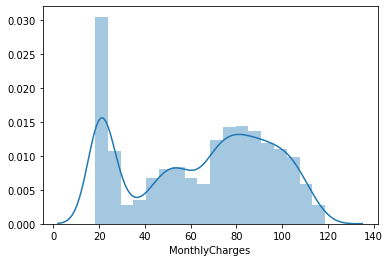

In [5]:
sns.distplot(telcom["MonthlyCharges"])

In [6]:
telcom["TotalCharges"].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

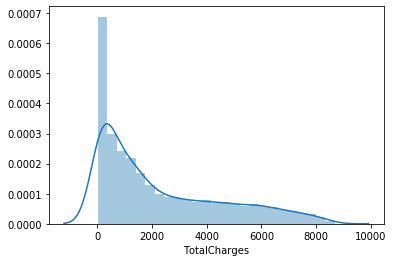

In [7]:
sns.distplot(telcom["TotalCharges"])

In [8]:
# #show distribution with binning
# enc = KBinsDiscretizer(n_bins=10, encode='onehot')
# X_binned = enc.fit_transform(X)


#MonthlyCharges to categorical column
def mc_lab(telcom) :
    if telcom["MonthlyCharges"] <= 30 :
        return "MonthlyCharges_0-30"
    elif (telcom["MonthlyCharges"] > 30) & (telcom["MonthlyCharges"] <= 60 ):
        return "MonthlyCharges_30-60"
    elif (telcom["MonthlyCharges"] > 60) & (telcom["MonthlyCharges"] <= 90) :
        return "MonthlyCharges_60-90"
    elif (telcom["MonthlyCharges"] > 90) :
        return "MonthlyCharges_90-120"

telcom["mc_group"] = telcom.apply(lambda telcom:mc_lab(telcom), axis = 1)

#TotalCharges to categorical column
def tc_lab(telcom) :
    if telcom["TotalCharges"] <= 400 :
        return "TotalCharges_0-400"
    elif (telcom["TotalCharges"] > 400) & (telcom["TotalCharges"] <= 1400 ):
        return "TotalCharges_400-1400"
    elif (telcom["TotalCharges"] > 1400) & (telcom["TotalCharges"] <= 4000) :
        return "TotalCharges_1400-4000"
    elif (telcom["TotalCharges"] > 4000) :
        return "TotalCharges_4000-9000"
    
telcom["tc_group"] = telcom.apply(lambda telcom:tc_lab(telcom), axis = 1)

In [9]:
telcom[["MonthlyCharges", "mc_group","TotalCharges", "tc_group" ]]

,MonthlyCharges,mc_group,TotalCharges,tc_group
0,29.85,MonthlyCharges_0-30,29.85,TotalCharges_0-400
1,56.95,MonthlyCharges_30-60,1889.50,TotalCharges_1400-4000
2,53.85,MonthlyCharges_30-60,108.15,TotalCharges_0-400
3,42.30,MonthlyCharges_30-60,1840.75,TotalCharges_1400-4000
4,70.70,MonthlyCharges_60-90,151.65,TotalCharges_0-400
...,...,...,...,...
7027,84.80,MonthlyCharges_60-90,1990.50,TotalCharges_1400-4000
7028,103.20,MonthlyCharges_90-120,7362.90,TotalCharges_4000-9000
7029,29.60,MonthlyCharges_0-30,346.45,TotalCharges_0-400
7030,74.40,MonthlyCharges_60-90,306.60,TotalCharges_0-400


In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])
    
#Duplicating columns for multi value columns
telcom = pd.get_dummies(data = telcom,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")


In [11]:
summary = (df_telcom_og[[i for i in df_telcom_og.columns if i not in Id_col]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)


In [12]:
#correlation
correlation = telcom.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X = telcom[[i for i in telcom.columns if i not in Id_col + target_col]]
Y = telcom[target_col + Id_col]

principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components,columns = ["PC1","PC2"])
pca_data = pca_data.merge(Y,left_index=True,right_index=True,how="left")
pca_data["Churn"] = pca_data["Churn"].replace({1:"Churn",0:"Not Churn"})

def pca_scatter(target,color) :
    tracer = go.Scatter(x = pca_data[pca_data["Churn"] == target]["PC1"] ,
                        y = pca_data[pca_data["Churn"] == target]["PC2"],
                        name = target,mode = "markers",
                        marker = dict(color = color,
                                      line = dict(width = .5),
                                      symbol =  "diamond-open"),
                        text = ("Customer Id : " + 
                                pca_data[pca_data["Churn"] == target]['customerID'])
                       )
    return tracer

layout = go.Layout(dict(title = "Visualising data with principal components",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "principal component 1",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "principal component 2",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        height = 600
                       )
                  )
trace1 = pca_scatter("Churn",'red')
trace2 = pca_scatter("Not Churn",'royalblue')
data = [trace2,trace1]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [14]:
#Explained Variance
pca.explained_variance_ratio_

# first principal component contains 34.45% of the variance 
# and the second principal component contains 15.53% of the variance. 
# Together, the two components contain 49.98% of the information.

array([0.3281275 , 0.14441868])

In [15]:
#separating binary columns
bi_cs = telcom.nunique()[telcom.nunique() == 2].keys()
dat_rad = telcom[bi_cs]

#plotting radar chart for churn and non churn customers(binary variables)
def plot_radar(df,aggregate,title) :
    data_frame = df[df["Churn"] == aggregate] 
    data_frame_x = data_frame[bi_cs].sum().reset_index()
    data_frame_x.columns  = ["feature","yes"]
    data_frame_x["no"]    = data_frame.shape[0]  - data_frame_x["yes"]
    data_frame_x  = data_frame_x[data_frame_x["feature"] != "Churn"]
    
    #count of 1's(yes)
    trace1 = go.Scatterpolar(r = data_frame_x["yes"].values.tolist(),
                             theta = data_frame_x["feature"].tolist(),
                             fill  = "toself",name = "count of 1's",
                             mode = "markers+lines",
                             marker = dict(size = 5)
                            )
    #count of 0's(No)
    trace2 = go.Scatterpolar(r = data_frame_x["no"].values.tolist(),
                             theta = data_frame_x["feature"].tolist(),
                             fill  = "toself",name = "count of 0's",
                             mode = "markers+lines",
                             marker = dict(size = 5)
                            ) 
    layout = go.Layout(dict(polar = dict(radialaxis = dict(visible = True,
                                                           side = "counterclockwise",
                                                           showline = True,
                                                           linewidth = 2,
                                                           tickwidth = 2,
                                                           gridcolor = "white",
                                                           gridwidth = 2),
                                         angularaxis = dict(tickfont = dict(size = 10),
                                                            layer = "below traces"
                                                           ),
                                         bgcolor  = "rgb(243,243,243)",
                                        ),
                            paper_bgcolor = "rgb(243,243,243)",
                            title = title,height = 700))
    
    data = [trace2,trace1]
    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig)

#plot
plot_radar(dat_rad,1,"Churn -  Customers")
plot_radar(dat_rad,0,"Non Churn - Customers")

# Feature Selection

## Information Gain Ratio

In [16]:
from info_gain import info_gain

In [17]:
ig = info_gain.info_gain(
    [i for j in telcom[["Churn"]].values.tolist() for i in j], 
    [i for j in telcom[["gender"]].values.tolist() for i in j])
iv = info_gain.intrinsic_value(
    [i for j in telcom[["Churn"]].values.tolist() for i in j], 
    [i for j in telcom[["gender"]].values.tolist() for i in j])
igr = info_gain.info_gain_ratio(
    [i for j in telcom[["Churn"]].values.tolist() for i in j], 
    [i for j in telcom[["gender"]].values.tolist() for i in j])
print(ig, iv, igr)

3.650433802859787e-05 0.9999364550464405 3.6506657842475086e-05


In [18]:
telcom.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'Churn', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure_group_Tenure_0-12', 'tenure_group_Tenure_12-24',
       'tenure_group_Tenure_24-48', 'tenure_group_Tenure_48-60',
       'tenure_group_Tenure_gt_60', 'mc_group_MonthlyCharges_0-30',
       'mc_group_MonthlyCharges_30-60', 'mc_group_MonthlyCharges_60-90',
       'mc_group_MonthlyCharges_90-120', 'tc_group_TotalCharges_0-400',
      

In [19]:
cols = telcom.columns.drop("Churn")
igr_list = []
for col in cols:
    key_value = []
    key_value.append(col)
    igr = info_gain.info_gain_ratio(
        [i for j in telcom[["Churn"]].values.tolist() for i in j], 
        [i for j in telcom[[col]].values.tolist() for i in j])
    key_value.append(igr)
    igr_list.append(key_value)
igr_list = sorted(igr_list, key=lambda x: x[1], reverse=True)

In [20]:
igr_list

[['Contract_Month-to-month', 0.09235281896343028],
 ['Contract_Two year', 0.07589196548717857],
 ['tenure_group_Tenure_0-12', 0.05453497758034015],
 ['InternetService_Fiber optic', 0.04814268303535587],
 ['PaymentMethod_Electronic check', 0.04754353817240682],
 ['customerID', 0.04530782361333185],
 ['tenure_group_Tenure_gt_60', 0.043594016137315665],
 ['TotalCharges', 0.04261858012116569],
 ['InternetService_No', 0.04152834342887101],
 ['mc_group_MonthlyCharges_0-30', 0.03238861099817813],
 ['tc_group_TotalCharges_0-400', 0.028230116871118847],
 ['Contract_One year', 0.02451372606097407],
 ['PaperlessBilling', 0.019608483445709122],
 ['OnlineSecurity', 0.018387846323370167],
 ['MonthlyCharges', 0.017314578412818846],
 ['TechSupport', 0.0168204189977627],
 ['SeniorCitizen', 0.016456675767921917],
 ['Dependents', 0.01622659711793133],
 ['tc_group_TotalCharges_4000-9000', 0.015276997925954031],
 ['tenure', 0.01334914403133967],
 ['PaymentMethod_Credit card (automatic)', 0.0131286662696591

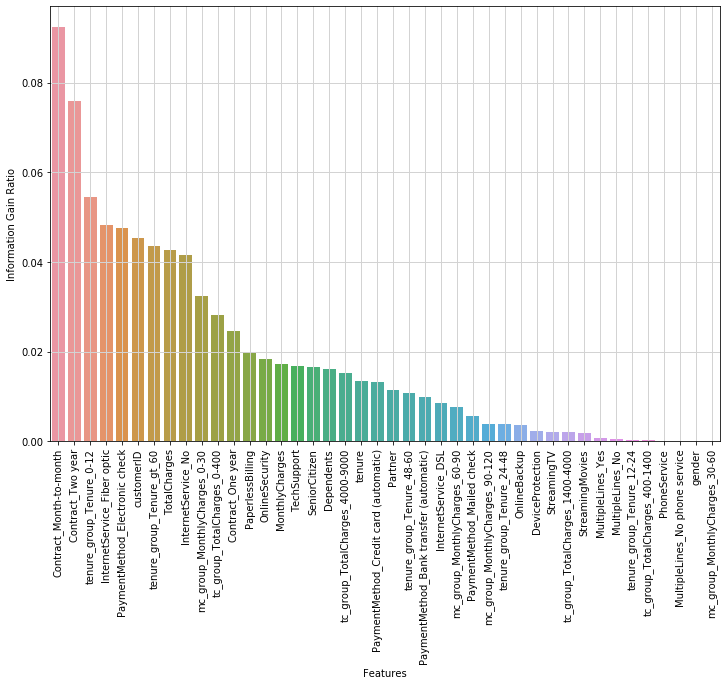

In [21]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Features", y="Information Gain Ratio", data=pd.DataFrame(igr_list, columns=['Features', 'Information Gain Ratio']))
plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

## Chi-Square Test

In [22]:
from sklearn.feature_selection import chi2
from sklearn import preprocessing as prep
import scipy as sp

In [23]:
def get_chi_squared_results(series_A, series_B):
    contingency_table = pd.crosstab(series_A, series_B)
    chi2_stat, p_value, dof, expected_table = sp.stats.chi2_contingency(contingency_table)
    threshold = sp.stats.chi2.ppf(0.95, dof)
    return chi2_stat, threshold, p_value

In [24]:
print('{:<20} {:>12} {:>12}\t{:<10} {:<3}'.format('Feature', 'Chi2', 'Threshold', 'P-value', 'Is Significant?'))
X, y = telcom.drop(columns=['Churn']), telcom['Churn']
chi2_list = []
for f in telcom.drop(columns=['Churn']).columns:
    key_value = []
    chi2_stat, threshold, p_value = get_chi_squared_results(telcom[f], y)
    is_over_threshold = chi2_stat >= threshold
    is_result_significant = p_value <= 0.05
    print('{:<20} {:>12.2f} {:>12.2f}\t{:<10.2f} {}'.format(
        f, chi2_stat, threshold, p_value, (is_over_threshold and is_result_significant)
    ))
    key_value.append(f)
    key_value.append(chi2_stat)
    chi2_list.append(key_value)
chi2_list = sorted(chi2_list, key=lambda x: x[1], reverse=True)

Feature                      Chi2    Threshold	P-value    Is Significant?
customerID                7032.00      7227.18	0.49       False
gender                       0.48         3.84	0.49       False
SeniorCitizen              158.44         3.84	0.00       True
Partner                    157.50         3.84	0.00       True
Dependents                 186.32         3.84	0.00       True
PhoneService                 0.87         3.84	0.35       False
OnlineSecurity             205.42         3.84	0.00       True
OnlineBackup                47.25         3.84	0.00       True
DeviceProtection            30.50         3.84	0.00       True
TechSupport                189.97         3.84	0.00       True
StreamingTV                 27.84         3.84	0.00       True
StreamingMovies             25.76         3.84	0.00       True
PaperlessBilling           256.87         3.84	0.00       True
MultipleLines_No             7.35         3.84	0.01       True
MultipleLines_No phone service         0.

In [25]:
chi2_list

[['customerID', 7032.000000000002],
 ['TotalCharges', 6503.575355417988],
 ['MonthlyCharges', 2118.854888521635],
 ['Contract_Month-to-month', 1149.1043152026427],
 ['tenure', 1060.2925967496435],
 ['tenure_group_Tenure_0-12', 716.8371078257962],
 ['InternetService_Fiber optic', 663.3564569173802],
 ['Contract_Two year', 637.8483512964128],
 ['PaymentMethod_Electronic check', 637.5886972291464],
 ['InternetService_No', 362.94784884289265],
 ['tenure_group_Tenure_gt_60', 358.1366414900954],
 ['tc_group_TotalCharges_0-400', 341.0227209380952],
 ['mc_group_MonthlyCharges_0-30', 307.81783331775665],
 ['PaperlessBilling', 256.87490836218717],
 ['Contract_One year', 222.37496841462385],
 ['OnlineSecurity', 205.41578737378245],
 ['TechSupport', 189.96675360285266],
 ['Dependents', 186.32163933855873],
 ['SeniorCitizen', 158.4408162893713],
 ['Partner', 157.50315146557506],
 ['tc_group_TotalCharges_4000-9000', 153.6607951796995],
 ['PaymentMethod_Credit card (automatic)', 126.82484301871541],


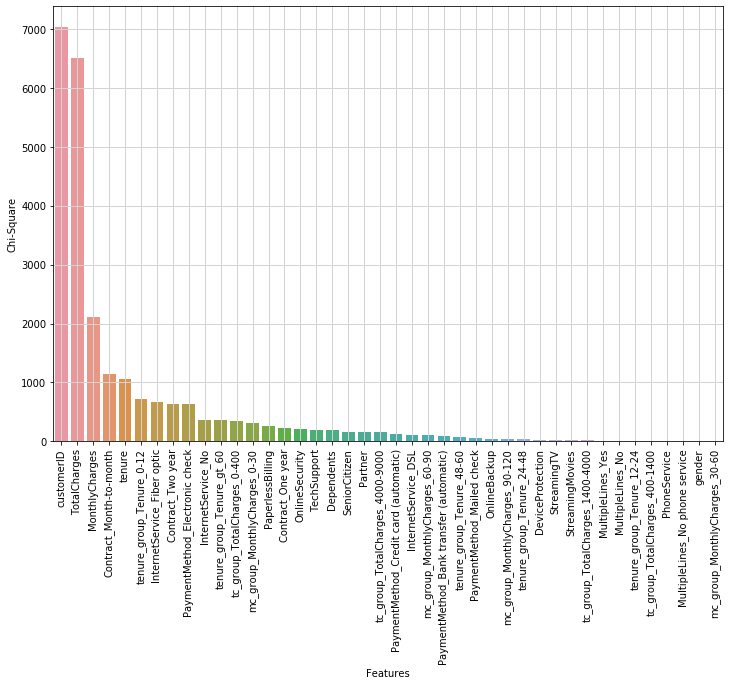

In [26]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Features", y="Chi-Square", data=pd.DataFrame(chi2_list, columns=['Features', 'Chi-Square']))
plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

## FeatureSelector

In [27]:
from feature_selector import FeatureSelector

In [28]:
train = telcom.drop(columns=['Churn'])
train_labels = telcom['Churn']

In [47]:
train.shape

(7032, 42)

In [30]:
fs = FeatureSelector(data = train, labels = train_labels)

Identifying collinear features:

In [31]:
fs.identify_collinear(correlation_threshold = 0.98)

1 features with a correlation magnitude greater than 0.98.



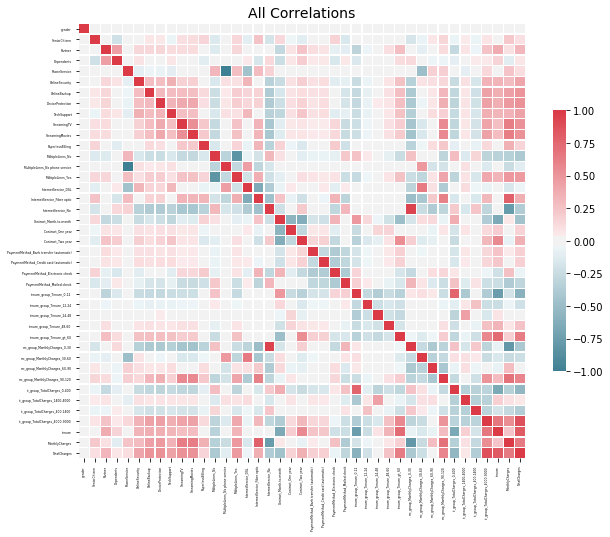

In [32]:
fs.plot_collinear(plot_all = True)

In [33]:
# list of collinear features to remove
collinear_features = fs.ops['collinear']
# dataframe of collinear features
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,MultipleLines_No phone service,PhoneService,-1.0


Identifying zero importance features:

In [34]:
# Pass in the appropriate parameters
fs.identify_zero_importance(task = 'classification', 
                            eval_metric = 'auc', 
                            n_iterations = 10, 
                             early_stopping = True)
# list of zero importance features
zero_importance_features = fs.ops['zero_importance']

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.845286	valid_0's binary_logloss: 0.448115
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.827841	valid_0's binary_logloss: 0.435005
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.870862	valid_0's binary_logloss: 0.394828
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.824484	valid_0's binary_logloss: 0.438569
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.840915	valid_0's binary_logloss: 0.42103
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.845717	valid_0's binary_logloss: 0.418457
T

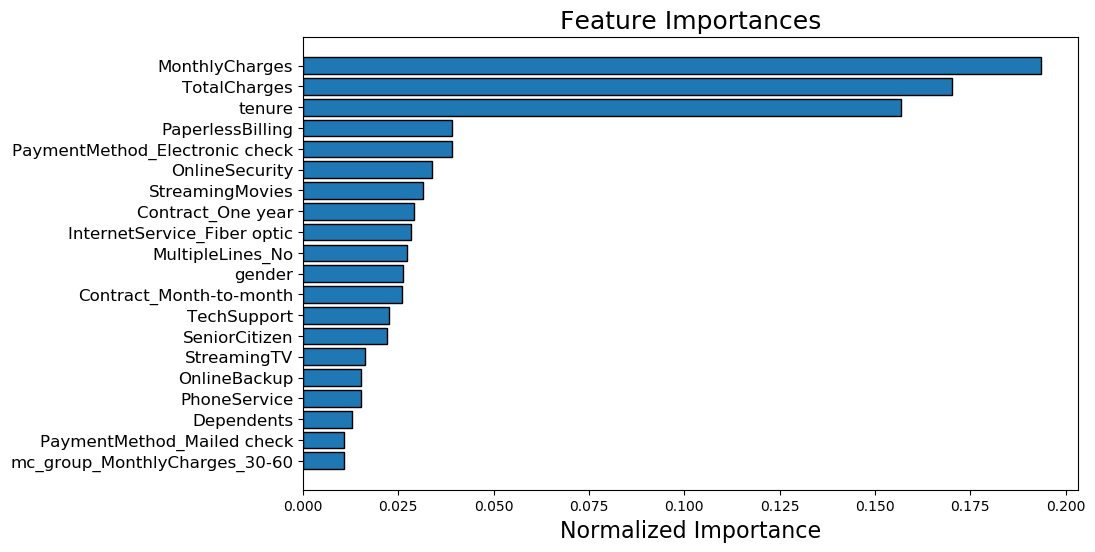

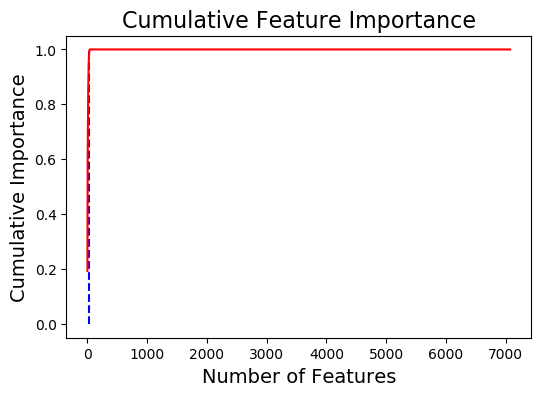

31 features required for 0.99 of cumulative importance


In [35]:
# plot the feature importances
fs.plot_feature_importances(threshold = 0.99, plot_n = 20)

Identifying low importance features:

In [36]:
fs.identify_low_importance(cumulative_importance = 0.99)

30 features required for cumulative importance of 0.99 after one hot encoding.
7043 features do not contribute to cumulative importance of 0.99.



In [37]:
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,MonthlyCharges,287.4,0.193535,0.193535
1,TotalCharges,252.9,0.170303,0.363838
2,tenure,232.8,0.156768,0.520606
3,PaperlessBilling,58.0,0.039057,0.559663
4,PaymentMethod_Electronic check,58.0,0.039057,0.598721
5,OnlineSecurity,50.3,0.033872,0.632593
6,StreamingMovies,46.9,0.031582,0.664175
7,Contract_One year,43.4,0.029226,0.693401
8,InternetService_Fiber optic,42.0,0.028283,0.721684
9,MultipleLines_No,40.6,0.027340,0.749024


In [38]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 7043 features including one-hot features.


In [48]:
train_removed_all.shape

(7032, 31)

In [49]:
train_removed_all.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,mc_group_MonthlyCharges_30-60,mc_group_MonthlyCharges_60-90,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,...,0,0,0,1,0,1,0,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,0,0,...,0,0,0,1,1,1,0,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,1,0,1,1,...,1,0,0,0,0,1,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,-1.239504,0.196178,-0.940457


In [51]:
train_removed_all.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MultipleLines_No',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure_group_Tenure_0-12',
 'mc_group_MonthlyCharges_30-60',
 'mc_group_MonthlyCharges_60-90',
 'tenure',
 'MonthlyCharges',
 'TotalCharges']

## Variance Inflation Factor

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
x = telcom.drop(columns=['customerID','Churn'])
y = telcom['Churn']

In [68]:
def cal_vif(x):
    thresh = 5
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    for i in range(1, k):
        print('Iteration no ', i)
        print(vif)
        a = np.argmax(vif)
        print('Max vif ', a)
        if vif[a] <= thresh:
            break
        if i == 1:
            output = x.drop(x.columns[a], axis=1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1:
            output = output.drop(output.columns[a], axis=1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return output

selected_features = cal_vif(x)
selected_features.head()

Iteration no  1
[1.0037795918982546, 1.1545925966791446, 1.467584462948211, 1.3854881227187668, inf, 6.3689423746101905, 6.818434769212838, 6.958240973923184, 6.51289265544111, 24.1562416053748, 24.2174388466777, 1.2099274477702973, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 44.89333727209177, 901.1154457932432, 22.82023069623873]
Max vif  4
Iteration no  2
[1.0037795918982546, 1.1545925966791448, 1.4675844629482104, 1.3854881227187668, 6.3689423746101905, 6.818434769212838, 6.958240973923184, 6.51289265544111, 24.1562416053748, 24.2174388466777, 1.2099274477702973, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 44.89333727209177, 901.1154457932432, 22.82023069623873]
Max vif  11
Iteration no  3
[1.0037795918982546, 1.1545925966791446, 1.467584462948211, 1.385488122718767, 6.3689423746101905, 6.8184347692128435, 6.9582

,gender,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,PaymentMethod_Mailed check,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,mc_group_MonthlyCharges_30-60,mc_group_MonthlyCharges_60-90,tc_group_TotalCharges_0-400,tc_group_TotalCharges_1400-4000,tc_group_TotalCharges_400-1400
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,1,0,0,0,...,1,0,1,0,0,1,0,0,1,0
2,1,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
3,1,0,0,0,1,0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [72]:
selected_features.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure_group_Tenure_12-24',
 'tenure_group_Tenure_24-48',
 'tenure_group_Tenure_48-60',
 'tenure_group_Tenure_gt_60',
 'mc_group_MonthlyCharges_30-60',
 'mc_group_MonthlyCharges_60-90',
 'tc_group_TotalCharges_0-400',
 'tc_group_TotalCharges_1400-4000',
 'tc_group_TotalCharges_400-1400']